In [1]:
'''prepare data for spotify extracted features for train and test'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, Imputer, LabelEncoder

In [2]:
def read_data(datafile,selected_features):
    data = pd.read_csv(datafile)
    feature = data.loc[:,selected_features]
    # Encode the genre and replace it
    genre = feature.loc[:,'genre']
    le = LabelEncoder()
    le.fit(genre)
    encoded_col = le.transform(genre)
    feature['genre'] = encoded_col
    labels = data.loc[:, 'class']
    imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
    imputed_feature = imputer.fit_transform(feature)
    scaler = StandardScaler()
    features_scaled = scaler.fit(imputed_feature).transform(imputed_feature)
    return features_scaled, labels

In [3]:
data = './spotify_trainingdata/labeled_traningdata_no_librosa_combined.csv'
selected_features = ['genre','sp_energy','sp_valence','sp_danceability','sp_tempo','sp_speechiness','sp_acousticness','sp_instrumentalness','sp_liveness','sp_loudness']
feature,label = read_data(data,selected_features)
print("one============")
print(feature[0])

one============
[-1.86842299 -1.56929282  0.1926071  -1.90707186 -0.23195415 -0.41452618
  2.78496489 -0.22470245 -0.47265705 -0.0551177 ]


highest k is:  3
highest score is:  57.14285714285714


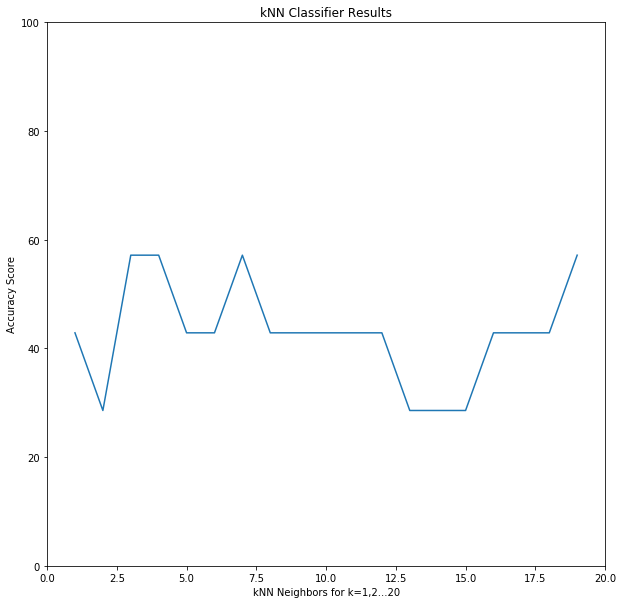

In [4]:
'''
    Using KNN model
'''
# data = './spotify_trainingdata/labeled_traningdata_no_librosa_combined.csv'
data_1 = './spotify_trainingdata/labeled_traingingdata_no_librosa_combine_pruned.csv'

selected_features = ['genre','sp_energy','sp_valence','sp_danceability','sp_tempo','sp_speechiness','sp_acousticness','sp_instrumentalness','sp_liveness','sp_loudness']
feature_1,label_1 = read_data(data_1,selected_features)

test_size = 0.10
random_seed = 42
train_d_1, test_d_1, train_l_1, test_l_1 = train_test_split(feature_1, label_1, test_size=test_size, random_state=random_seed)

result = []
xlabel = [i for i in range(1, 20)]
highest_k = 0
highest_score = 0
for neighbors in range(1, 20):
    kNN = KNeighborsClassifier(n_neighbors=neighbors)
    kNN.fit(train_d_1, train_l_1)
    prediction = kNN.predict(test_d_1)
    score = accuracy_score(prediction, test_l_1)*100
    result.append(score)
    if score > highest_score:
        highest_score = score
        highest_k = neighbors
        
print("highest k is: ", highest_k) 
print("highest score is: ", highest_score)

plt.figure(figsize=(10, 10))
plt.xlabel('kNN Neighbors for k=1,2...20')
plt.ylabel('Accuracy Score')
plt.title('kNN Classifier Results')
plt.ylim(0, 100)
plt.xlim(0, xlabel[len(xlabel)-1]+1)
plt.plot(xlabel, result)
plt.savefig('Spotify-knn.png')
plt.show()

In [8]:
'''KNN model with cross validation'''
#deal with NaN values
# data = './spotify_trainingdata/labeled_traningdata_no_librosa_combined.csv'
data = './spotify_trainingdata/labeled_traingingdata_no_librosa_combine_pruned.csv'
selected_features = ['genre','sp_energy','sp_valence','sp_danceability','sp_tempo','sp_speechiness','sp_acousticness','sp_instrumentalness','sp_liveness','sp_loudness']
feature,label = read_data(data,selected_features)

clf = KNeighborsClassifier(n_neighbors = highest_k)
scores = cross_val_score(clf,feature,label,cv=5)
print(scores.mean())

0.33974358974358976


In [6]:
'''Using SVC model '''
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


# data = './spotify_trainingdata/labeled_traningdata_no_librosa_combined.csv'
data_2 = './spotify_trainingdata/labeled_traingingdata_no_librosa_combine_pruned.csv'

selected_features = ['genre','sp_energy','sp_valence','sp_danceability','sp_tempo','sp_speechiness','sp_acousticness','sp_instrumentalness','sp_liveness','sp_loudness']
feature2,label2 = read_data(data_2,selected_features)

x_for_kfold = feature2
kfold = KFold(n_splits = 5)
train_index_start = []
train_index_end = []
test_index_start =[]
test_index_end = []
for train_indices, test_indices in kfold.split(x_for_kfold):
    print('Train: %s | Test %s' % (train_indices, test_indices))
    train_index_start.append(train_indices[0])
    train_index_end.append(train_indices[-1])
    test_index_start.append(test_indices[0])
    test_index_end.append(test_indices[-1])

for i1, i2, i3, i4 in zip(train_index_start, train_index_end, test_index_start, test_index_end):
    train_d2 = feature2[i1:i2+1]
    train_l2 = label2[i1:i2+1]
    test_d2 = feature2[i3:i4+1]
    test_l2 = label2[i3:i4+1]
    clf = SVC()
    clf.fit(train_d2, train_l2)
    hyp = clf.predict(test_d2)
    print('Accuracy:', accuracy_score(test_l2, hyp))

Train: [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61] | Test [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61] | Test [13 14 15 16 17 18 19 20 21 22 23 24 25]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61] | Test [26 27 28 29 30 31 32 33 34 35 36 37]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 50 51 52 53 54 55 56 57 58 59
 60 61] | Test [38 39 40 41 42 43 44 45 46 47 48 49]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] | Test [50 51 5

In [10]:
'''SVC using seperate test data'''
selected_features = ['genre','sp_energy','sp_valence','sp_danceability','sp_tempo','sp_speechiness','sp_acousticness','sp_instrumentalness','sp_liveness','sp_loudness']
traindata= './spotify_trainingdata/labeled_traningdata_no_librosa_combined.csv'
trainfeature,trainlabel = read_data(traindata,selected_features)
testdata = './testdata/testdata_spotify.csv'
testfeature,testlabel = read_data(testdata,selected_features)
clf = SVC()
clf.fit(trainfeature, trainlabel)
hyp = clf.predict(testfeature)
print('Accuracy:', accuracy_score(testlabel, hyp))

Accuracy: 0.4444444444444444


In [7]:
'''Using Decision Tree'''
# Create a decision tree and cross-validate for accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

selected_features = ['genre','sp_energy','sp_valence','sp_danceability','sp_tempo','sp_speechiness','sp_acousticness','sp_instrumentalness','sp_liveness','sp_loudness']
# traindata = './spotify_trainingdata/labeled_traningdata_no_librosa_combined.csv'
traindata = './spotify_trainingdata/labeled_traingingdata_no_librosa_combine_pruned.csv'
trainfeature,trainlabel = read_data(traindata,selected_features)
testdata = './testdata/testdata_spotify.csv'
testfeature,testlabel = read_data(testdata,selected_features)

folds=5
grid_params = {'criterion':('entropy', 'gini'), 'max_depth': [2, 3, 4, 5, 6]}

# X_train, X_test, y_train, y_test = train_test_split(feature_imputed, labels, test_size=0.1)

decision_tree = DecisionTreeClassifier()
classifier = GridSearchCV(decision_tree, grid_params, cv=folds)
classifier.fit(trainfeature, trainlabel)
hyp = classifier.predict(testfeature)
print(classifier.best_score_)
print(classifier.best_estimator_)
print("Accuracy score using decision_tree: %0.4f" %(accuracy_score(testlabel,hyp)))

0.45161290322580644
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy score using decision_tree: 0.4444


In [8]:
'''Using Random Forest'''
selected_features = ['genre','sp_energy','sp_valence','sp_danceability','sp_tempo','sp_speechiness','sp_acousticness','sp_instrumentalness','sp_liveness','sp_loudness']
# traindata = './spotify_trainingdata/labeled_traningdata_no_librosa_combined.csv'
traindata_1 = './spotify_trainingdata/labeled_traingingdata_no_librosa_combine_pruned.csv'
trainfeature_1,trainlabel_1 = read_data(traindata_1,selected_features)

testdata_1 = './testdata/testdata_spotify.csv'
testfeature_1,testlabel_1 = read_data(testdata_1,selected_features)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfclf = RandomForestClassifier()
rfclf.fit(trainfeature_1, trainlabel_1)
hyprf = rfclf.predict(testfeature_1)
print('Accuracy score using random forest: %0.4f' % (accuracy_score(testlabel_1,hyprf)))

from xgboost import XGBClassifier
xgbclf = XGBClassifier()#tune xgb classifier
xgbclf.fit(trainfeature_1, trainlabel_1)
hypxgb = xgbclf.predict(testfeature_1)
print("Accuracy score using gradient boosting: %0.4f" %(accuracy_score(testlabel_1,hypxgb)))


from sklearn.ensemble import AdaBoostClassifier
abclf = AdaBoostClassifier()
abclf.fit(trainfeature_1, trainlabel_1)
abhyp = abclf.predict(testfeature_1)
print("Accuracy score using adaboosting: %0.4f" %(accuracy_score(testlabel,abhyp)))

Accuracy score using random forest: 0.5556
Accuracy score using gradient boosting: 0.5556
Accuracy score using adaboosting: 0.7778


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
selected_features = ['genre','sp_energy','sp_valence','sp_danceability','sp_tempo','sp_speechiness','sp_acousticness','sp_instrumentalness','sp_liveness','sp_loudness']
demotrainfts, demotrainlbs = read_data('./spotify_trainingdata/labeled_traingingdata_no_librosa_combine_pruned.csv',selected_features)
 
data = pd.read_csv('./DemoData/demodata_spotify.csv')
demofeature = data.loc[:,selected_features]
# Encode the genre and replace it
genre = demofeature.loc[:,'genre']
le = LabelEncoder()
le.fit(genre)
encoded_col = le.transform(genre)
demofeature['genre'] = encoded_col
imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imputed_demofeature = imputer.fit_transform(demofeature)
scaler = StandardScaler()
demofeatures_scaled = scaler.fit(imputed_demofeature).transform(imputed_demofeature)
kNNsp = KNeighborsClassifier(n_neighbors=3)
kNNsp.fit(demotrainfts, demotrainlbs)
prediction = kNNsp.predict(imputed_demofeature)
print ("result with knn {}".format(prediction))

result with knn ['angry' 'angry' 'angry' 'angry']


In [17]:
abclf = AdaBoostClassifier()
abclf.fit(demotrainfts, demotrainlbs)
abhyp = abclf.predict(imputed_demofeature)
print ("result with knn {}".format(abhyp))

result with knn ['sad' 'sad' 'sad' 'sad']


In [18]:
clf = SVC()
clf.fit(demotrainfts, demotrainlbs)
hyp = clf.predict(imputed_demofeature)
print ("result with svm {}".format(hyp))

result with svm ['sad' 'sad' 'sad' 'sad']
